# Grover's Search Algorithm

### The target number to be searched is the sum of each digit if my ID: 6331866 module 15. Which is equals to 1
### Hence the target is 1

In [1]:
from qiskit import*
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import math

pi = math.pi

#### Let's create a dataset respresenting the 16 possible states.

In [2]:
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
states = ["0000", "0001", "0010", "0011", "0100", "0101", "0110", "0111",
          "1000", "1001", "1010", "1011", "1100", "1101", "1110", "1111"]

In [3]:
numbers = DataFrame({'states': states}, index= index)
numbers

,states
0,0000
1,0001
2,0010
3,0011
4,0100
5,0101
6,0110
7,0111
8,1000
9,1001


In [4]:
#We are looking for this state
print("State to search: ", states[index[1]])

State to search:  0001


In [5]:
oracle = QuantumCircuit(4, name = 'oracle')
#Appling Haramand gate to all bits to set supperposition
oracle.h(0)
oracle.h(1)
oracle.h(2)
oracle.h(3)
oracle.to_gate()
oracle.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

##### A triple Controlled Z gate is needed to implement the Grover's algorithm
##### The Pauli-Z gate is a single-qubit rotation through π radians around the z-axis

In [6]:
#Buildign the oracle
#I will applay NOT gates to the 2nd, 3rd and 4th quibits
oracle.x(1)
oracle.x(2)
oracle.x(3)

#Applying a triple Pauli Z gate using CRZ gates
oracle.crz(pi / 4, [0], [3])
oracle.cx([0], [1])
oracle.crz(-pi/4, [1], [3])
oracle.cx([0], [1])
oracle.crz(pi/4, [1], [3])
oracle.cx([1], [2])
oracle.crz(-pi/4, [2], [3])
oracle.cx([0], [2])
oracle.crz(pi/4, [2], [3])
oracle.cx([1], [2])
oracle.crz(-pi/4, [2], [3])
oracle.cx([0], [2])
oracle.crz(pi/4, [2], [3])

#I will applay NOT gates to the 2nd, 3rd and 4th quibits
oracle.x(1)
oracle.x(2)
oracle.x(3)

oracle.to_gate()
oracle.draw()

┌───┐                                                                  »
q_0: ┤ H ├──────────■───────■────────────────■──────────────────────────────»
     ├───┤┌───┐     │     ┌─┴─┐            ┌─┴─┐                            »
q_1: ┤ H ├┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■───────■──────────────»
     ├───┤├───┤     │     └───┘     │      └───┘     │     ┌─┴─┐            »
q_2: ┤ H ├┤ X ├─────┼───────────────┼────────────────┼─────┤ X ├─────■──────»
     ├───┤├───┤┌────┴────┐     ┌────┴─────┐     ┌────┴────┐└───┘┌────┴─────┐»
q_3: ┤ H ├┤ X ├┤ Rz(π/4) ├─────┤ Rz(-π/4) ├─────┤ Rz(π/4) ├─────┤ Rz(-π/4) ├»
     └───┘└───┘└─────────┘     └──────────┘     └─────────┘     └──────────┘»
«                                                           
«q_0: ──■────────────────────────────────■──────────────────
«       │                     ┌───┐      │                  
«q_1: ──┼───────────────■─────┤ X ├──────┼──────────────────
«     ┌─┴─┐           ┌─┴─┐   └───┘    ┌─┴─┐           ┌───┐
«q_2: ┤ X ├─────■─────┤ X ├─────■──────┤ X ├─────■─────┤ X ├
«     └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐├───┤
«q_3: ─────┤ Rz(π/4) ├─────┤ Rz(-π/4) ├─────┤ Rz(π/4) ├┤ X ├
«          └─────────┘     └──────────┘     └─────────┘└───┘

In [7]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(4,4)
grover_circ.append(oracle, [0,1,2,3])
grover_circ.draw()

┌─────────┐
q_0: ┤0        ├
     │         │
q_1: ┤1        ├
     │  oracle │
q_2: ┤2        ├
     │         │
q_3: ┤3        ├
     └─────────┘
c: 4/═══════════

In [8]:
job = execute(grover_circ , backend)
result = job.result()

In [9]:
sv = result.get_statevector()
np.around(sv , 4)

array([ 0.25-0.j  ,  0.  +0.25j,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
        0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  , -0.  -0.25j,
        0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
        0.25-0.j  ])

In [10]:
reflection = QuantumCircuit(4, name = 'reflection')
#Appling Haramand gate to every quibit
reflection.h(0)
reflection.h(1)
reflection.h(2)
reflection.h(3)

#Applaing NOT gate to all quibits
reflection.x(0)
reflection.x(1)
reflection.x(2)
reflection.x(3)

#Making the CCCZ gate with Pauli gates
reflection.crz(pi / 4, [0], [3])
reflection.cx([0], [1])
reflection.crz(-pi/4, [1], [3])
reflection.cx([0], [1])
reflection.crz(pi/4, [1], [3])
reflection.cx([1], [2])
reflection.crz(-pi/4, [2], [3])
reflection.cx([0], [2])
reflection.crz(pi/4, [2], [3])
reflection.cx([1], [2])
reflection.crz(-pi/4, [2], [3])
reflection.cx([0], [2])
reflection.crz(pi/4, [2], [3])

#Appling NOT gates to all
reflection.x(0)
reflection.x(1)
reflection.x(2)
reflection.x(3)

#Appling Haramand gate to all
reflection.h(0)
reflection.h(1)
reflection.h(2)
reflection.h(3)

reflection.to_gate()

Instruction(name='reflection', num_qubits=4, num_clbits=0, params=[])

In [11]:
reflection.draw()

┌───┐┌───┐                                                             »
q_0: ┤ H ├┤ X ├─────■───────■────────────────■──────────────────────────────»
     ├───┤├───┤     │     ┌─┴─┐            ┌─┴─┐                            »
q_1: ┤ H ├┤ X ├─────┼─────┤ X ├─────■──────┤ X ├─────■───────■──────────────»
     ├───┤├───┤     │     └───┘     │      └───┘     │     ┌─┴─┐            »
q_2: ┤ H ├┤ X ├─────┼───────────────┼────────────────┼─────┤ X ├─────■──────»
     ├───┤├───┤┌────┴────┐     ┌────┴─────┐     ┌────┴────┐└───┘┌────┴─────┐»
q_3: ┤ H ├┤ X ├┤ Rz(π/4) ├─────┤ Rz(-π/4) ├─────┤ Rz(π/4) ├─────┤ Rz(-π/4) ├»
     └───┘└───┘└─────────┘     └──────────┘     └─────────┘     └──────────┘»
«                                              ┌───┐   ┌───┐     
«q_0: ──■────────────────────────────────■─────┤ X ├───┤ H ├─────
«       │                     ┌───┐      │     ├───┤   └───┘     
«q_1: ──┼───────────────■─────┤ X ├──────┼─────┤ H ├─────────────
«     ┌─┴─┐           ┌─┴─┐   └───┘    ┌─┴─┐   └───┘   ┌───┐┌───┐
«q_2: ┤ X ├─────■─────┤ X ├─────■──────┤ X ├─────■─────┤ X ├┤ H ├
«     └───┘┌────┴────┐└───┘┌────┴─────┐└───┘┌────┴────┐├───┤├───┤
«q_3: ─────┤ Rz(π/4) ├─────┤ Rz(-π/4) ├─────┤ Rz(π/4) ├┤ X ├┤ H ├
«          └─────────┘     └──────────┘     └─────────┘└───┘└───┘

In [12]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(4,4)
grover_circ.append(oracle, [0,1,2,3])
grover_circ.append(reflection, [0,1,2,3])
grover_circ.measure([0,1,2,3], [0,1,2,3])

In [13]:
grover_circ.draw()

┌─────────┐┌─────────────┐┌─┐         
q_0: ┤0        ├┤0            ├┤M├─────────
     │         ││             │└╥┘┌─┐      
q_1: ┤1        ├┤1            ├─╫─┤M├──────
     │  oracle ││  reflection │ ║ └╥┘┌─┐   
q_2: ┤2        ├┤2            ├─╫──╫─┤M├───
     │         ││             │ ║  ║ └╥┘┌─┐
q_3: ┤3        ├┤3            ├─╫──╫──╫─┤M├
     └─────────┘└─────────────┘ ║  ║  ║ └╥┘
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

In [14]:
job = execute(grover_circ, backend, shots = 1000)
result = job.result()
f_result = result.get_counts()
f_result

{'0001': 224,
 '1010': 60,
 '0011': 41,
 '1000': 69,
 '1101': 64,
 '0100': 55,
 '0110': 40,
 '1110': 58,
 '0000': 32,
 '0101': 48,
 '1001': 54,
 '1111': 52,
 '0111': 39,
 '1100': 63,
 '1011': 63,
 '0010': 38}

### We see that the '0001' state gets the highest probability

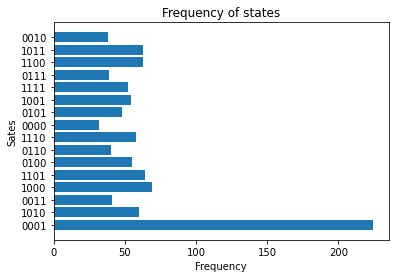

In [15]:
states = list(f_result.keys())
values = list(f_result.values())
# create a horizontal bar chart
plt.barh(states, values)

# add labels to the x and y axis and give a title to the chart
plt.xlabel('Frequency')
plt.ylabel('Sates')
plt.title('Frequency of states')

# show the chart
plt.show()